# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
import warnings
plt.style.use('ggplot')
%matplotlib inline

warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
pd.set_option("display.max_column",29)

In [3]:
df = pd.read_csv(r"C:\Users\Lakshay\Downloads\Databel - Data (1).csv")

In [4]:
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Phone Number,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,0,3,Yes,0,KS,382-4657,Female,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,0,3,Yes,0,OH,371-7191,Male,49,No,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,3,Yes,0,OH,375-9999,Male,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,2,Yes,0,MO,329-9001,Female,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,3,Yes,0,WV,330-8173,Male,51,No,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [6]:
df.sample(5)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Phone Number,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
4524,8401-RNML,Yes,6,44,69.0,24.0,84.6,Yes,no,21.2,1,6,Yes,0,MN,236-3033,Male,48,No,No,No,0,No,Month-to-Month,Direct Debit,47,294,Dissatisfaction,Service dissatisfaction
1967,3356-CDIH,No,70,402,844.0,0.0,0.0,No,yes,0.0,0,9,Yes,0,FL,276-6701,Male,69,No,Yes,No,0,Yes,Two Year,Credit Card,59,4148,NaN,NaN
3824,2083-SPHH,Yes,41,224,493.3,212.0,689.0,Yes,no,172.3,4,10,Yes,0,UT,368-5647,Male,33,No,No,No,0,Yes,One Year,Direct Debit,28,1170,Competitor,Competitor offered higher download speeds
3063,6857-XPYD,No,33,216,425.7,132.0,264.0,Yes,no,66.0,0,4,Yes,0,NM,316-5311,Female,61,No,No,No,0,Yes,Month-to-Month,Direct Debit,24,777,NaN,NaN
1901,4140-JQIZ,No,72,333,1012.9,0.0,0.0,No,no,0.0,0,20,Yes,0,ID,327-9801,Female,29,Yes,No,No,0,Yes,Two Year,Credit Card,54,3916,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [8]:
df.drop("Customer ID", axis=1, inplace=True)

# EDA

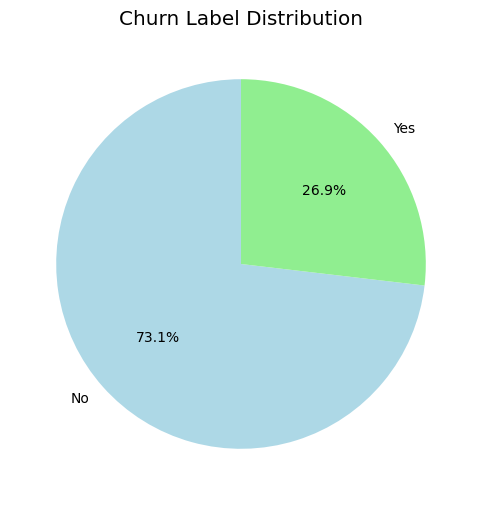

In [9]:
# Count the number of 'Yes' and 'No' in the 'Churn Label' column
churn_counts = df['Churn Label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Churn Label Distribution')
plt.ylabel('')
plt.show()

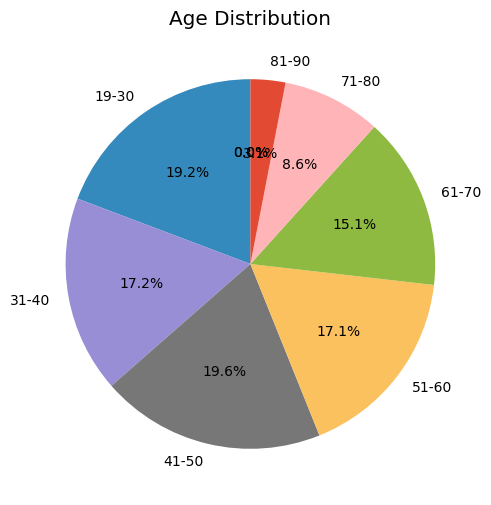

In [10]:
# Define age groups
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of customers in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Plot the pie chart for age distribution
plt.figure(figsize=(8, 6))
age_group_counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution')
plt.ylabel('')
plt.show()

In [11]:
df.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Phone Number,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,Age Group
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,3,Yes,0,KS,382-4657,Female,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN,31-40
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,3,Yes,0,OH,371-7191,Male,49,No,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN,41-50
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,3,Yes,0,OH,375-9999,Male,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN,51-60
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,2,Yes,0,MO,329-9001,Female,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN,41-50
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,3,Yes,0,WV,330-8173,Male,51,No,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN,51-60


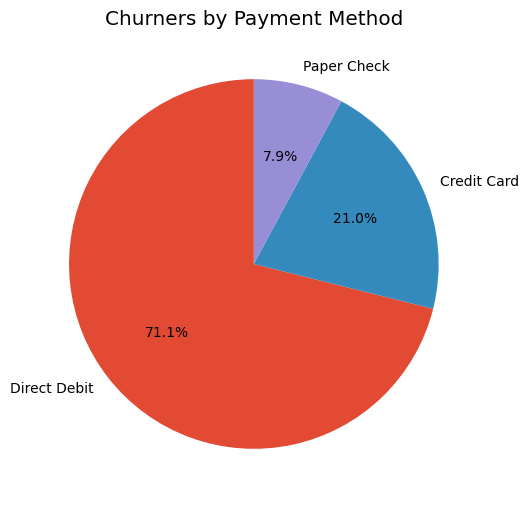

In [12]:
# Count the number of churners by payment method
churn_payment_counts = df[df['Churn Label'] == 'Yes']['Payment Method'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
churn_payment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Churners by Payment Method')
plt.ylabel('')
plt.show()

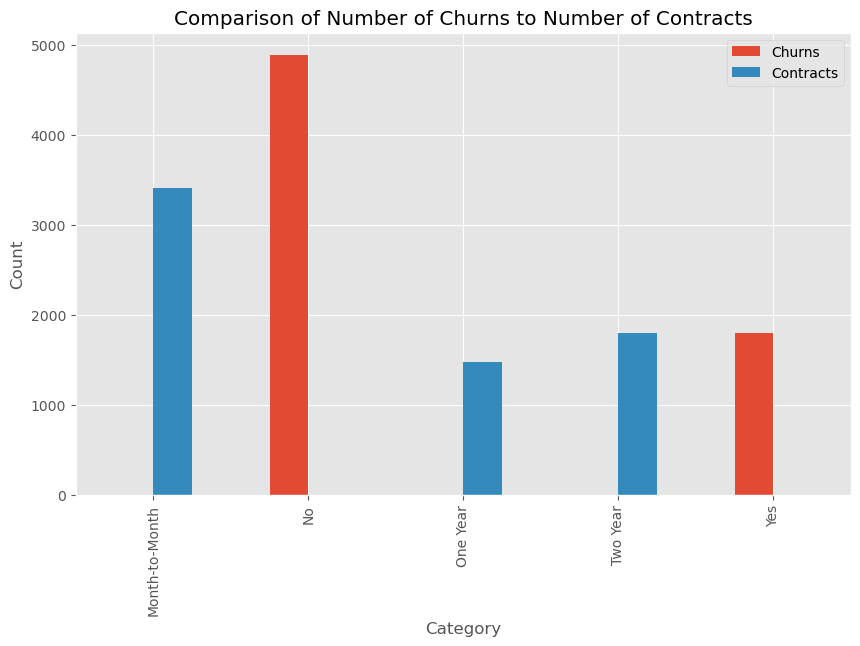

In [13]:
# Count the number of churns and total contracts
churn_counts = df['Churn Label'].value_counts()
contract_counts = df['Contract Type'].value_counts()

# Create a DataFrame for plotting
churn_contract_df = pd.DataFrame({
    'Churns': churn_counts,
    'Contracts': contract_counts
})


churn_contract_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Number of Churns to Number of Contracts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [14]:
df.shape

(6687, 29)

## DUPLICATE DATA


In [15]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


## Null DATA

In [16]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                           0
Payment Method                    

In [17]:
print(df['Churn Reason'].unique())

[nan 'Competitor made better offer' 'Moved'
 'Competitor had better devices'
 'Competitor offered higher download speeds' 'Attitude of support person'
 'Network reliability' "Don't know" 'Service dissatisfaction'
 'Product dissatisfaction' 'Poor expertise of online support'
 'Price too high' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Competitor offered more data' 'Attitude of service provider'
 'Poor expertise of phone support' 'Extra data charges' 'Deceased'
 'Lack of self-service on Website']


In [18]:
# given it is a categorical column, with a lot of unique values, it is better to drop it
df.drop('Churn Reason', axis=1, inplace=True)

##  DATA ENCODING

#### checking for unique values in each column

In [19]:

object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"{column} ({df[column].nunique()}): {df[column].unique()}")    

Churn Label (2): ['No' 'Yes']
Intl Active (2): ['No' 'Yes']
Intl Plan (2): ['no' 'yes']
Unlimited Data Plan (2): ['Yes' 'No']
State (51): ['KS' 'OH' 'MO' 'WV' 'RI' 'IA' 'NY' 'ID' 'VT' 'TX' 'CO' 'SC' 'NE' 'IL'
 'NH' 'LA' 'AZ' 'OK' 'GA' 'MA' 'MD' 'AR' 'WI' 'OR' 'MI' 'WY' 'VA' 'CA'
 'MN' 'SD' 'WA' 'UT' 'NJ' 'NM' 'NV' 'DC' 'IN' 'KY' 'ME' 'MT' 'MS' 'AL'
 'FL' 'AK' 'DE' 'TN' 'NC' 'CT' 'PA' 'ND' 'HI']
Phone Number (6677): ['382-4657' '371-7191' '375-9999' ... '328-3647' '346-8275' '257-5893']
Gender (3): ['Female' 'Male' 'Prefer not to say']
Under 30 (2): ['No' 'Yes']
Senior (2): ['No' 'Yes']
Group (2): ['No' 'Yes']
Device Protection & Online Backup (2): ['No' 'Yes']
Contract Type (3): ['Month-to-Month' 'One Year' 'Two Year']
Payment Method (3): ['Direct Debit' 'Paper Check' 'Credit Card']
Churn Category (5): [nan 'Competitor' 'Other' 'Attitude' 'Dissatisfaction' 'Price']


##### dropping Phone Number, since it is unique for each customer

In [20]:

df.drop('Phone Number', axis=1, inplace=True)
object_columns = object_columns.drop('Phone Number')
object_columns = object_columns.drop('Churn Label')



#### giving each state a number as in to not add 51 more columns during one hot encoding

In [21]:
states = ['KS', 'OH', 'MO', 'WV', 'RI', 'IA', 'NY', 'ID', 'VT', 'TX', 
          'CO', 'SC', 'NE', 'IL', 'NH', 'LA', 'AZ', 'OK', 'GA', 'MA', 
          'MD', 'AR', 'WI', 'OR', 'MI', 'WY', 'VA', 'CA', 'MN', 'SD', 
          'WA', 'UT', 'NJ', 'NM', 'NV', 'DC', 'IN', 'KY', 'ME', 'MT', 
          'MS', 'AL', 'FL', 'AK', 'DE', 'TN', 'NC', 'CT', 'PA', 'ND', 'HI']

state_map = {state: idx + 1 for idx, state in enumerate(states)}

# Encode the State column
for i in range(len(df)):
    df.loc[i, 'State'] = state_map[df.loc[i, 'State']]

df.head()
object_columns = object_columns.drop('State')


In [22]:
df['State'] = df['State'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Churn Label                        6687 non-null   object  
 1   Account Length (in months)         6687 non-null   int64   
 2   Local Calls                        6687 non-null   int64   
 3   Local Mins                         6687 non-null   float64 
 4   Intl Calls                         6687 non-null   float64 
 5   Intl Mins                          6687 non-null   float64 
 6   Intl Active                        6687 non-null   object  
 7   Intl Plan                          6687 non-null   object  
 8   Extra International Charges        6687 non-null   float64 
 9   Customer Service Calls             6687 non-null   int64   
 10  Avg Monthly GB Download            6687 non-null   int64   
 11  Unlimited Data Plan                6687 non

#### Apply one-hot encoding to the remaining object columns


In [23]:
df = pd.get_dummies(df, columns=object_columns, drop_first=True)


In [24]:
pd.set_option('display.max_columns', None)
df.head(10)

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,State,Age,Number of Customers in Group,Monthly Charge,Total Charges,Age Group,Intl Active_Yes,Intl Plan_yes,Unlimited Data Plan_Yes,Gender_Male,Gender_Prefer not to say,Under 30_Yes,Senior_Yes,Group_Yes,Device Protection & Online Backup_Yes,Contract Type_One Year,Contract Type_Two Year,Payment Method_Direct Debit,Payment Method_Paper Check,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Other,Churn Category_Price
0,No,1,3,8.0,0.0,0.0,0.0,0,3,0,1,35,0,10,10,31-40,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,No,33,179,431.3,0.0,0.0,0.0,0,3,0,2,49,0,21,703,41-50,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,False,False
2,No,44,82,217.6,0.0,0.0,0.0,0,3,0,2,51,0,23,1014,51-60,False,True,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False
3,No,10,47,111.6,60.0,71.0,0.0,0,2,0,3,41,0,17,177,41-50,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,No,62,184,621.2,310.0,694.4,0.0,0,3,0,4,51,0,28,1720,51-60,True,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False
5,No,17,68,120.7,0.0,0.0,0.0,0,0,0,5,23,0,9,156,19-30,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
6,No,57,428,849.2,0.0,0.0,0.0,0,5,0,6,38,0,47,2671,31-40,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False
7,No,25,54,203.7,0.0,0.0,0.0,0,12,0,6,29,0,47,1197,19-30,False,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,False
8,No,70,171,627.4,0.0,0.0,0.0,0,1,0,7,47,0,52,3593,41-50,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
9,No,50,206,445.8,0.0,0.0,0.0,0,0,0,8,61,0,11,539,61-70,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


# Data Correlation

## PCA (principal Component aanlysis)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Churn Label                            6687 non-null   object  
 1   Account Length (in months)             6687 non-null   int64   
 2   Local Calls                            6687 non-null   int64   
 3   Local Mins                             6687 non-null   float64 
 4   Intl Calls                             6687 non-null   float64 
 5   Intl Mins                              6687 non-null   float64 
 6   Extra International Charges            6687 non-null   float64 
 7   Customer Service Calls                 6687 non-null   int64   
 8   Avg Monthly GB Download                6687 non-null   int64   
 9   Extra Data Charges                     6687 non-null   int64   
 10  State                                  6687 non-null   int64

In [26]:
from sklearn.decomposition import PCA

# Ensure all columns are numeric before applying StandardScaler
df_numeric = df.drop('Churn Label', axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=2)  # You can change the number of components as needed
principal_components = pca.fit_transform(df_scaled)

# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Churn Label'] = df['Churn Label'].values

print(pca_df.head())

   Principal Component 1  Principal Component 2 Churn Label
0              -2.639666               0.261894          No
1              -0.408363               0.476147          No
2              -0.227758              -0.498509          No
3              -1.936924               0.629647          No
4               2.641583              -0.451409          No


## Multicolenearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop('Churn Label', axis=1).columns 
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

print(vif_data)

                                  feature        VIF
0              Account Length (in months)   8.665392
1                             Local Calls  12.810502
2                              Local Mins  15.439205
3                              Intl Calls   3.965186
4                               Intl Mins   6.981950
5             Extra International Charges   3.371074
6                  Customer Service Calls   1.502761
7                 Avg Monthly GB Download   1.733181
8                      Extra Data Charges   1.543250
9                                   State   1.005854
10                                    Age   4.287617
11           Number of Customers in Group   5.715883
12                         Monthly Charge   4.473452
13                          Total Charges   8.463103
14                              Age Group        NaN
15                        Intl Active_Yes   2.428988
16                          Intl Plan_yes   1.458218
17                Unlimited Data Plan_Yes   2.

In [28]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop('Churn Label', axis=1).columns  
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

# Identify features with high VIF
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()

df_reduced = df.drop(columns=high_vif_features)

print("Features with high VIF removed:", high_vif_features)
print("Remaining features:", df_reduced.columns)

Features with high VIF removed: ['Local Calls', 'Local Mins']
Remaining features: Index(['Churn Label', 'Account Length (in months)', 'Intl Calls', 'Intl Mins',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Extra Data Charges', 'State', 'Age',
       'Number of Customers in Group', 'Monthly Charge', 'Total Charges',
       'Age Group', 'Intl Active_Yes', 'Intl Plan_yes',
       'Unlimited Data Plan_Yes', 'Gender_Male', 'Gender_Prefer not to say',
       'Under 30_Yes', 'Senior_Yes', 'Group_Yes',
       'Device Protection & Online Backup_Yes', 'Contract Type_One Year',
       'Contract Type_Two Year', 'Payment Method_Direct Debit',
       'Payment Method_Paper Check', 'Churn Category_Competitor',
       'Churn Category_Dissatisfaction', 'Churn Category_Other',
       'Churn Category_Price'],
      dtype='object')


In [29]:
df.shape

(6687, 33)

## Heatmap  

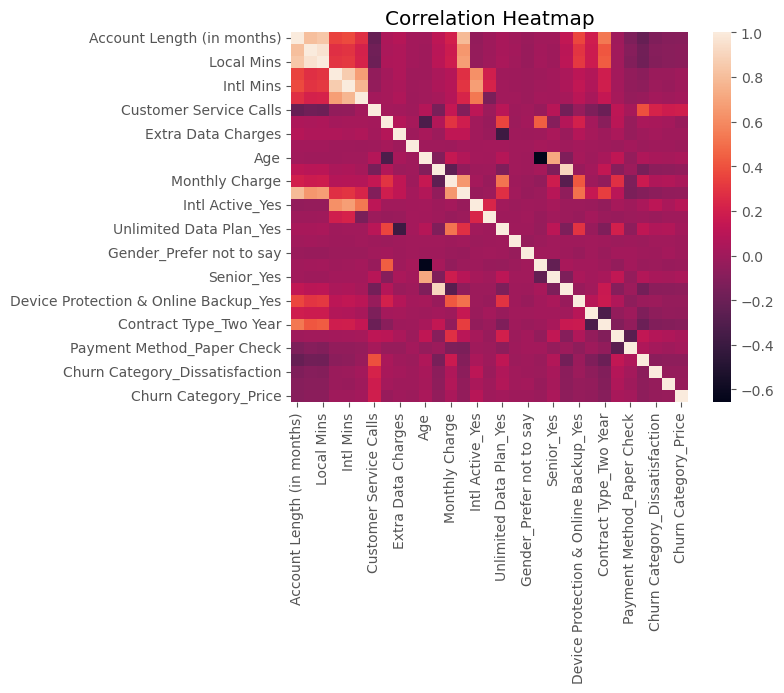

In [30]:
# Drop the 'Age Group' column before calculating the correlation matrix
correlation_matrix = df.drop(['Churn Label', 'Age Group'], axis=1).corr()
sns.heatmap(correlation_matrix, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

# DIVINDING DATA INTO TRAINING AND TESING

In [31]:
X = df_reduced.drop('Churn Label', axis=1)
y = df_reduced['Churn Label']

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing the model

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()  # KNN classifier

knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)


In [33]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)


Accuracy: 0.9603886397608371


## DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()  # Decision tree classifier

decision_tree_model.fit(X_train_scaled, y_train)
y_pred = decision_tree_model.predict(X_test_scaled)


In [35]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", decision_tree_accuracy)



Accuracy: 0.9417040358744395


## LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()

Logistic_model.fit(X_train_scaled, y_train)
y_pred = Logistic_model.predict(X_test_scaled)

In [37]:
Logistic_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Logistic_accuracy)

Accuracy: 0.9693572496263079


## RANDOM FORREST

In [41]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_model = RandomForestClassifier()  
Random_Forest_model.fit(X_train_scaled, y_train)
y_pred = Random_Forest_model.predict(X_test_scaled)


In [42]:
Random_Forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Random_Forest_accuracy)


Accuracy: 0.9708520179372198


## SVM

In [38]:
from sklearn.svm import SVC
SVM_model = SVC()  # Support Vector Classifier

SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)


In [39]:
SVM_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", SVM_accuracy)


Accuracy: 0.9656203288490284


#  COMPARING THE MODELS

In [44]:
accuracy_dict = {
    "Random Forest": Random_Forest_accuracy,  
    "Decision Tree Classifier": decision_tree_accuracy,
    "K-Nearest Neighbors (KNN)": knn_accuracy,
    "Support Vector Machine (SVM)": SVM_accuracy,
    "Logistic Regression": Logistic_accuracy,
}


## ROC Curve 
a metric used to measure the performance of a binary classification model by plotting the true positive rate (TPR) against the false positive rate (FPR) on a receiver operating characteristic (ROC) curve

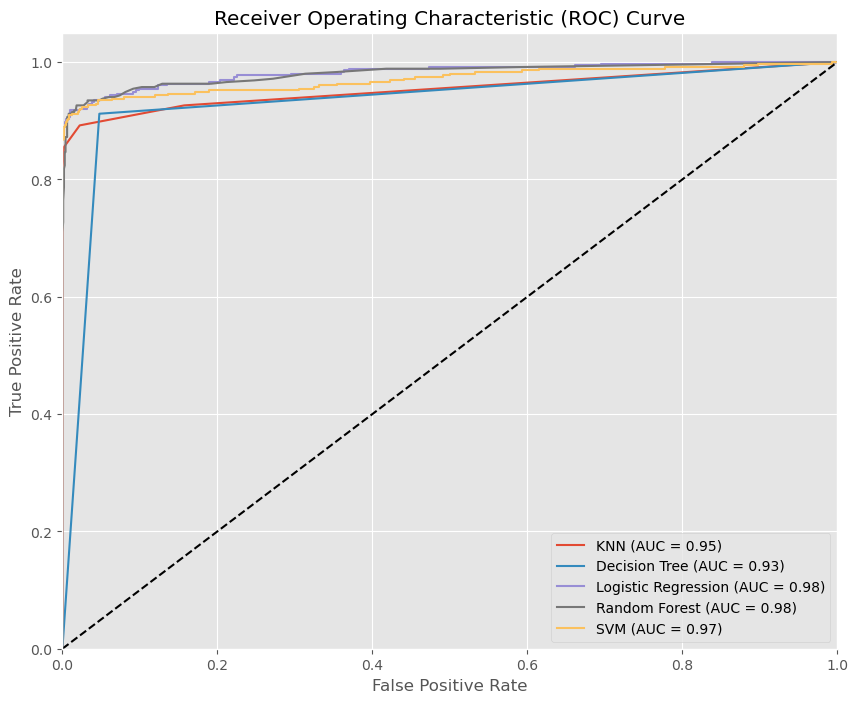

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_binary = y_test.map({'No': 0, 'Yes': 1}).values

models = {
    "KNN": knn_model,
    "Decision Tree": decision_tree_model,
    "Logistic Regression": Logistic_model,
    "Random Forest": Random_Forest_model,
    "SVM": SVM_model,
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test_scaled)
        else:
            y_score = model.predict(X_test_scaled)
        
        fpr, tpr, _ = roc_curve(y_test_binary, y_score)
        roc_auc = roc_auc_score(y_test_binary, y_score)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## F1 Scores

In [46]:
from sklearn.metrics import f1_score

# Calculate F1 scores
f1_scores = {
    "Random Forest": f1_score(y_test, Random_Forest_model.predict(X_test_scaled), pos_label='Yes'),
    "Decision Tree Classifier": f1_score(y_test, decision_tree_model.predict(X_test_scaled), pos_label='Yes'),
    "K-Nearest Neighbors (KNN)": f1_score(y_test, knn_model.predict(X_test_scaled), pos_label='Yes'),
    "Support Vector Machine (SVM)": f1_score(y_test, SVM_model.predict(X_test_scaled), pos_label='Yes'),
    "Logistic Regression": f1_score(y_test, Logistic_model.predict(X_test_scaled), pos_label='Yes'),
}

# Print F1 scores
for model_name, f1 in f1_scores.items():
    print(f"{model_name}: {f1:.5f}")


Random Forest: 0.94273
Decision Tree Classifier: 0.89167
K-Nearest Neighbors (KNN): 0.91908
Support Vector Machine (SVM): 0.93051
Logistic Regression: 0.93944


## Comparing Accuracies

In [47]:
best_model_name = max(accuracy_dict, key=accuracy_dict.get)
best_model_value = accuracy_dict[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {best_model_value}")


The best model is Random Forest with an accuracy of 0.9708520179372198


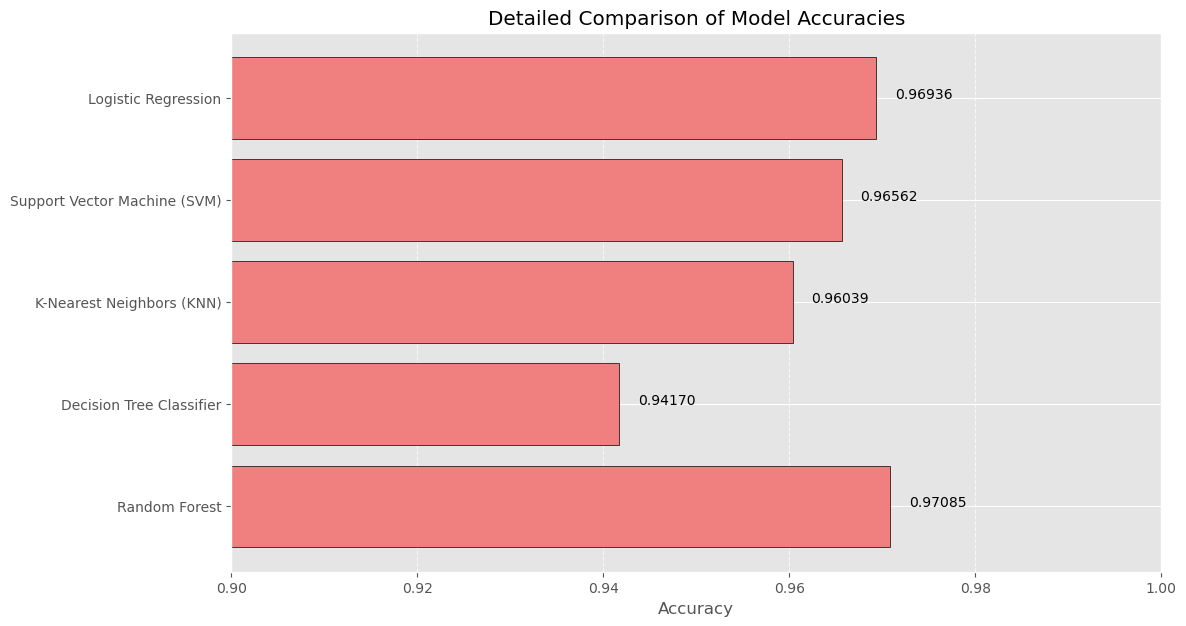

In [48]:

model_names = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

plt.figure(figsize=(12, 7))
bars = plt.barh(model_names, accuracies, color='lightcoral', edgecolor='black')
for bar, accuracy in zip(bars, accuracies):
    plt.text(
        bar.get_width() + 0.002,  
        bar.get_y() + bar.get_height() / 2,
        f"{accuracy:.5f}"
    )

plt.xlabel('Accuracy')
plt.title('Detailed Comparison of Model Accuracies')
plt.xlim(0.90, 1)  # Zoom in on the specific range
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()